## Import packages

In [1]:
import pandas as pd
import plotly
from chart_studio import plotly
# import MySQLdb
import fecfile
import requests
import time
# import sqlalchemy
#import pickle
import datetime
import numpy as np

## Data dictionary

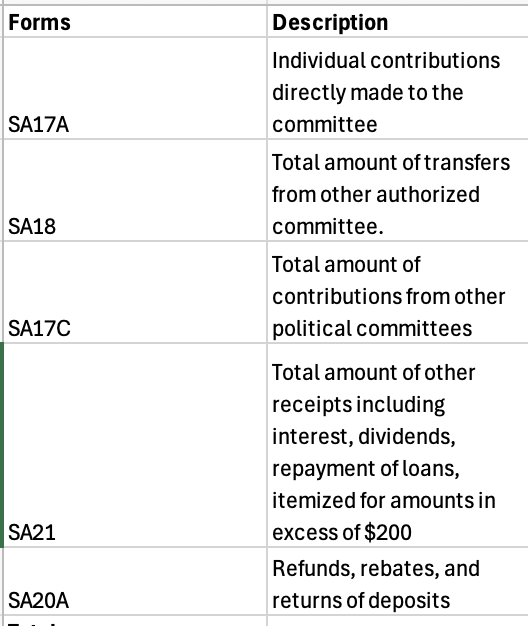

## Get file number for F3PN for each campaign

F3PN is for contributions and expenses.

- Kamala Harris for President - 1805248
- Donald J. Trump for President 2024, Inc. - 1805185

In [2]:
filing = fecfile.from_http('1805248') #file no for Kamala
# filing

## Schedule A: Contributions

Schedule B is for expenses

In [3]:
df = pd.DataFrame(filing['itemizations']['Schedule A'])
df.contribution_date=pd.to_datetime(df.contribution_date)
df.contribution_amount=pd.to_numeric(df.contribution_amount)
df[df.memo_code=='X'].to_clipboard(index=False)
pd.set_option('display.max_columns', None)
df

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,contributor_prefix,contributor_suffix,contributor_street_1,contributor_street_2,contributor_city,contributor_state,contributor_zip_code,election_code,election_other_description,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,donor_committee_fec_id,donor_committee_name,donor_candidate_fec_id,donor_candidate_last_name,donor_candidate_first_name,donor_candidate_middle_name,donor_candidate_prefix,donor_candidate_suffix,donor_candidate_office,donor_candidate_state,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,SA17A,C00703975,6883091,6883091E,SA17A,IND,,Attia,Patricia,,,,165 W End Ave,,New York,NY,100235503,P2024,,2024-04-30 00:00:00-04:00,360.00,360.00,,Self-Employed,Psychotherapy,,,,,,,,,,,,,,,,,,X,* Earmarked Contribution: See Below,
1,SA17A,C00703975,6883091E,,,PAC,ActBlue,,,,,,PO Box 441146,,West Somerville,MA,021440031,P2024,,2024-04-30 00:00:00-04:00,360.00,360.00,,,,C00401224,ActBlue,,,,,,,,,,,,,,,,X,* Above Contribution earmarked through this or...,
2,SA17A,C00703975,9059829,,,IND,,Attia,Patricia,,,,165 W End Ave,,New York,NY,100235503,P2024,,2024-06-27 00:00:00-04:00,-300.00,3960.00,,Self-Employed,Psychotherapy,,,,,,,,,,,,,,,,,,X,,
3,SA17A,C00703975,9059952,9059829,SA17A,IND,,Attia,Patricia,,,,165 W End Ave,,New York,NY,100235503,G2024,,2024-06-27 00:00:00-04:00,300.00,3960.00,,Self-Employed,Psychotherapy,,,,,,,,,,,,,,,,,,X,,
4,SA17A,C00703975,7716543,7716543E,SA17A,IND,,Attia,Patricia,,,,165 W End Ave,,New York,NY,100235503,P2024,,2024-05-30 00:00:00-04:00,360.00,360.00,,Self-Employed,Psychotherapy,,,,,,,,,,,,,,,,,,X,* Earmarked Contribution: See Below,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404378,SA20A,C00703975,10175800,,,ORG,Gusto,,,,,,525 20Th St,,San Francisco,CA,941074345,P2024,,2024-06-05 00:00:00-04:00,34.97,4441.44,,,,,,,,,,,,,,,,,,,,,,Payroll Tax Refund,
404379,SA20A,C00703975,10175801,,,ORG,Gusto,,,,,,525 20Th St,,San Francisco,CA,941074345,P2024,,2024-06-27 00:00:00-04:00,116.26,4935.34,,,,,,,,,,,,,,,,,,,,,,Payroll Tax Refund,
404380,SA20A,C00703975,10175802,,,ORG,Gusto,,,,,,525 20Th St,,San Francisco,CA,941074345,P2024,,2024-06-27 00:00:00-04:00,377.64,4935.34,,,,,,,,,,,,,,,,,,,,,,Payroll Tax Refund,
404381,SA20A,C00703975,10175759,,,COM,Biden Victory Fund,,,,,,430 S Capitol St SE,,Washington,DC,200034024,P2024,,2024-06-28 00:00:00-04:00,562113.34,4274565.52,,,,C00744946,Biden Victory Fund,,,,,,,,,,,,,,,,,Text Message Outreach,


In [4]:
df.form_type.value_counts()

SA17A    258362
SA18     146009
SA17C         7
SA20A         4
SA21          1
Name: form_type, dtype: int64

## SA17A: direct contributions

In [5]:
sa17a= df[df.form_type=='SA17A']
sa17a

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,contributor_prefix,contributor_suffix,contributor_street_1,contributor_street_2,contributor_city,contributor_state,contributor_zip_code,election_code,election_other_description,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,donor_committee_fec_id,donor_committee_name,donor_candidate_fec_id,donor_candidate_last_name,donor_candidate_first_name,donor_candidate_middle_name,donor_candidate_prefix,donor_candidate_suffix,donor_candidate_office,donor_candidate_state,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,SA17A,C00703975,6883091,6883091E,SA17A,IND,,Attia,Patricia,,,,165 W End Ave,,New York,NY,100235503,P2024,,2024-04-30 00:00:00-04:00,360.0,360.00,,Self-Employed,Psychotherapy,,,,,,,,,,,,,,,,,,X,* Earmarked Contribution: See Below,
1,SA17A,C00703975,6883091E,,,PAC,ActBlue,,,,,,PO Box 441146,,West Somerville,MA,021440031,P2024,,2024-04-30 00:00:00-04:00,360.0,360.00,,,,C00401224,ActBlue,,,,,,,,,,,,,,,,X,* Above Contribution earmarked through this or...,
2,SA17A,C00703975,9059829,,,IND,,Attia,Patricia,,,,165 W End Ave,,New York,NY,100235503,P2024,,2024-06-27 00:00:00-04:00,-300.0,3960.00,,Self-Employed,Psychotherapy,,,,,,,,,,,,,,,,,,X,,
3,SA17A,C00703975,9059952,9059829,SA17A,IND,,Attia,Patricia,,,,165 W End Ave,,New York,NY,100235503,G2024,,2024-06-27 00:00:00-04:00,300.0,3960.00,,Self-Employed,Psychotherapy,,,,,,,,,,,,,,,,,,X,,
4,SA17A,C00703975,7716543,7716543E,SA17A,IND,,Attia,Patricia,,,,165 W End Ave,,New York,NY,100235503,P2024,,2024-05-30 00:00:00-04:00,360.0,360.00,,Self-Employed,Psychotherapy,,,,,,,,,,,,,,,,,,X,* Earmarked Contribution: See Below,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258357,SA17A,C00703975,9056824E,,,PAC,ActBlue,,,,,,PO Box 441146,,West Somerville,MA,021440031,P2024,,2024-06-30 00:00:00-04:00,50.0,28031421.26,,,Conduit total listed in Agg. field,C00401224,ActBlue,,,,,,,,,,,,,,,,X,Note: Above Contribution earmarked through thi...,
258358,SA17A,C00703975,9495777,9495777E,SA17A,IND,,Zyscovich,Bernard,,,,100 Biscayne Blvd,Fl 27,Miami,FL,331322304,P2024,,2024-06-30 00:00:00-04:00,500.0,1000.00,,Zyscovich Inc.,Architect,,,,,,,,,,,,,,,,,,,* Earmarked Contribution: See Below,
258359,SA17A,C00703975,9495777E,,,PAC,ActBlue,,,,,,PO Box 441146,,West Somerville,MA,021440031,P2024,,2024-06-30 00:00:00-04:00,500.0,28031421.26,,,Conduit total listed in Agg. field,C00401224,ActBlue,,,,,,,,,,,,,,,,X,Note: Above Contribution earmarked through thi...,
258360,SA17A,C00703975,9487334,9487334E,SA17A,IND,,Zyskowski,Lori,,,,12 Ellery Ln,,Westport,CT,068805202,P2024,,2024-06-30 00:00:00-04:00,250.0,1000.00,,Gibson Dunn,Attorney,,,,,,,,,,,,,,,,,,,* Earmarked Contribution: See Below,


### SA17A: removing the memo code

In [6]:
sa17a_memo = sa17a[sa17a.memo_code!='X']
sa17a_memo

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,contributor_prefix,contributor_suffix,contributor_street_1,contributor_street_2,contributor_city,contributor_state,contributor_zip_code,election_code,election_other_description,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,donor_committee_fec_id,donor_committee_name,donor_candidate_fec_id,donor_candidate_last_name,donor_candidate_first_name,donor_candidate_middle_name,donor_candidate_prefix,donor_candidate_suffix,donor_candidate_office,donor_candidate_state,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
12,SA17A,C00703975,7918863,7918863E,SA17A,IND,,A Gittleman,Dean,,,,10 Balsam Ct,,Lawrence Township,NJ,086483118,P2024,,2024-06-01 00:00:00-04:00,100.0,200.0,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,,* Earmarked Contribution: See Below,
14,SA17A,C00703975,7926078,7926078E,SA17A,IND,,A Jones,Linda,,,,17 Dennis Town Rd,,Corinth,MS,388347328,P2024,,2024-06-01 00:00:00-04:00,100.0,446.0,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,,* Earmarked Contribution: See Below,
16,SA17A,C00703975,7947614,7947614E,SA17A,IND,,A Lovette,Patricia,,,,4 Prospect St,,Henniker,NH,032423013,P2024,,2024-06-02 00:00:00-04:00,250.0,250.0,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,,* Earmarked Contribution: See Below,
18,SA17A,C00703975,7941720,7941720E,SA17A,IND,,A Magnuson,Martha,,,,749 Dunham Ln,,Bolingbrook,IL,604401282,P2024,,2024-06-01 00:00:00-04:00,25.0,271.0,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,,* Earmarked Contribution: See Below,
20,SA17A,C00703975,7905336,7905336E,SA17A,IND,,A****N,ROBERT,,,,137 Harvest Dr,,Charlottesville,VA,229034847,P2024,,2024-06-01 00:00:00-04:00,500.0,500.0,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,,* Earmarked Contribution: See Below,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258352,SA17A,C00703975,9474521,9474521E,SA17A,IND,,Zylman,Carole,,,,3886 Pemberton Dr SE,,Grand Rapids,MI,495088892,P2024,,2024-06-30 00:00:00-04:00,15.0,405.0,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,,* Earmarked Contribution: See Below,
258354,SA17A,C00703975,9297716,9297716E,SA17A,IND,,Zylstra,Carol,,,,16095 N Elkins Rd,,Tucson,AZ,857399204,P2024,,2024-06-28 00:00:00-04:00,50.0,370.0,,Retired,Retired,,,,,,,,,,,,,,,,,,,* Earmarked Contribution: See Below,
258356,SA17A,C00703975,9056824,9056824E,SA17A,IND,,Zylstra,Janet,,,,6031 N Lydell Ave,,Whitefish Bay,WI,532174523,P2024,,2024-06-27 00:00:00-04:00,50.0,246.0,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,,* Earmarked Contribution: See Below,
258358,SA17A,C00703975,9495777,9495777E,SA17A,IND,,Zyscovich,Bernard,,,,100 Biscayne Blvd,Fl 27,Miami,FL,331322304,P2024,,2024-06-30 00:00:00-04:00,500.0,1000.0,,Zyscovich Inc.,Architect,,,,,,,,,,,,,,,,,,,* Earmarked Contribution: See Below,


In [7]:
sa17a_memo.contribution_amount.sum()

17010754.76

## Check: Just the memo codes

In [8]:
memo_x= sa17a[sa17a.memo_code=='X']
memo_x

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,contributor_prefix,contributor_suffix,contributor_street_1,contributor_street_2,contributor_city,contributor_state,contributor_zip_code,election_code,election_other_description,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,donor_committee_fec_id,donor_committee_name,donor_candidate_fec_id,donor_candidate_last_name,donor_candidate_first_name,donor_candidate_middle_name,donor_candidate_prefix,donor_candidate_suffix,donor_candidate_office,donor_candidate_state,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,SA17A,C00703975,6883091,6883091E,SA17A,IND,,Attia,Patricia,,,,165 W End Ave,,New York,NY,100235503,P2024,,2024-04-30 00:00:00-04:00,360.0,360.00,,Self-Employed,Psychotherapy,,,,,,,,,,,,,,,,,,X,* Earmarked Contribution: See Below,
1,SA17A,C00703975,6883091E,,,PAC,ActBlue,,,,,,PO Box 441146,,West Somerville,MA,021440031,P2024,,2024-04-30 00:00:00-04:00,360.0,360.00,,,,C00401224,ActBlue,,,,,,,,,,,,,,,,X,* Above Contribution earmarked through this or...,
2,SA17A,C00703975,9059829,,,IND,,Attia,Patricia,,,,165 W End Ave,,New York,NY,100235503,P2024,,2024-06-27 00:00:00-04:00,-300.0,3960.00,,Self-Employed,Psychotherapy,,,,,,,,,,,,,,,,,,X,,
3,SA17A,C00703975,9059952,9059829,SA17A,IND,,Attia,Patricia,,,,165 W End Ave,,New York,NY,100235503,G2024,,2024-06-27 00:00:00-04:00,300.0,3960.00,,Self-Employed,Psychotherapy,,,,,,,,,,,,,,,,,,X,,
4,SA17A,C00703975,7716543,7716543E,SA17A,IND,,Attia,Patricia,,,,165 W End Ave,,New York,NY,100235503,P2024,,2024-05-30 00:00:00-04:00,360.0,360.00,,Self-Employed,Psychotherapy,,,,,,,,,,,,,,,,,,X,* Earmarked Contribution: See Below,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258353,SA17A,C00703975,9474521E,,,PAC,ActBlue,,,,,,PO Box 441146,,West Somerville,MA,021440031,P2024,,2024-06-30 00:00:00-04:00,15.0,28031421.26,,,Conduit total listed in Agg. field,C00401224,ActBlue,,,,,,,,,,,,,,,,X,Note: Above Contribution earmarked through thi...,
258355,SA17A,C00703975,9297716E,,,PAC,ActBlue,,,,,,PO Box 441146,,West Somerville,MA,021440031,P2024,,2024-06-30 00:00:00-04:00,50.0,28031421.26,,,Conduit total listed in Agg. field,C00401224,ActBlue,,,,,,,,,,,,,,,,X,Note: Above Contribution earmarked through thi...,
258357,SA17A,C00703975,9056824E,,,PAC,ActBlue,,,,,,PO Box 441146,,West Somerville,MA,021440031,P2024,,2024-06-30 00:00:00-04:00,50.0,28031421.26,,,Conduit total listed in Agg. field,C00401224,ActBlue,,,,,,,,,,,,,,,,X,Note: Above Contribution earmarked through thi...,
258359,SA17A,C00703975,9495777E,,,PAC,ActBlue,,,,,,PO Box 441146,,West Somerville,MA,021440031,P2024,,2024-06-30 00:00:00-04:00,500.0,28031421.26,,,Conduit total listed in Agg. field,C00401224,ActBlue,,,,,,,,,,,,,,,,X,Note: Above Contribution earmarked through thi...,


In [9]:
memo_x.contribution_amount.sum()

16951418.43

## Filter all individual contributions in SA17A

In [10]:
sa17a_IND = sa17a[sa17a.entity_type=='IND']
sa17a_IND

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,contributor_prefix,contributor_suffix,contributor_street_1,contributor_street_2,contributor_city,contributor_state,contributor_zip_code,election_code,election_other_description,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,donor_committee_fec_id,donor_committee_name,donor_candidate_fec_id,donor_candidate_last_name,donor_candidate_first_name,donor_candidate_middle_name,donor_candidate_prefix,donor_candidate_suffix,donor_candidate_office,donor_candidate_state,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,SA17A,C00703975,6883091,6883091E,SA17A,IND,,Attia,Patricia,,,,165 W End Ave,,New York,NY,100235503,P2024,,2024-04-30 00:00:00-04:00,360.0,360.0,,Self-Employed,Psychotherapy,,,,,,,,,,,,,,,,,,X,* Earmarked Contribution: See Below,
2,SA17A,C00703975,9059829,,,IND,,Attia,Patricia,,,,165 W End Ave,,New York,NY,100235503,P2024,,2024-06-27 00:00:00-04:00,-300.0,3960.0,,Self-Employed,Psychotherapy,,,,,,,,,,,,,,,,,,X,,
3,SA17A,C00703975,9059952,9059829,SA17A,IND,,Attia,Patricia,,,,165 W End Ave,,New York,NY,100235503,G2024,,2024-06-27 00:00:00-04:00,300.0,3960.0,,Self-Employed,Psychotherapy,,,,,,,,,,,,,,,,,,X,,
4,SA17A,C00703975,7716543,7716543E,SA17A,IND,,Attia,Patricia,,,,165 W End Ave,,New York,NY,100235503,P2024,,2024-05-30 00:00:00-04:00,360.0,360.0,,Self-Employed,Psychotherapy,,,,,,,,,,,,,,,,,,X,* Earmarked Contribution: See Below,
6,SA17A,C00703975,9059619,,,IND,,Attia,Patricia,,,,165 W End Ave,,New York,NY,100235503,P2024,,2024-06-27 00:00:00-04:00,-360.0,3960.0,,Self-Employed,Psychotherapy,,,,,,,,,,,,,,,,,,X,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258352,SA17A,C00703975,9474521,9474521E,SA17A,IND,,Zylman,Carole,,,,3886 Pemberton Dr SE,,Grand Rapids,MI,495088892,P2024,,2024-06-30 00:00:00-04:00,15.0,405.0,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,,* Earmarked Contribution: See Below,
258354,SA17A,C00703975,9297716,9297716E,SA17A,IND,,Zylstra,Carol,,,,16095 N Elkins Rd,,Tucson,AZ,857399204,P2024,,2024-06-28 00:00:00-04:00,50.0,370.0,,Retired,Retired,,,,,,,,,,,,,,,,,,,* Earmarked Contribution: See Below,
258356,SA17A,C00703975,9056824,9056824E,SA17A,IND,,Zylstra,Janet,,,,6031 N Lydell Ave,,Whitefish Bay,WI,532174523,P2024,,2024-06-27 00:00:00-04:00,50.0,246.0,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,,* Earmarked Contribution: See Below,
258358,SA17A,C00703975,9495777,9495777E,SA17A,IND,,Zyscovich,Bernard,,,,100 Biscayne Blvd,Fl 27,Miami,FL,331322304,P2024,,2024-06-30 00:00:00-04:00,500.0,1000.0,,Zyscovich Inc.,Architect,,,,,,,,,,,,,,,,,,,* Earmarked Contribution: See Below,


In [11]:
sa17a_IND.contribution_amount.sum()

17011974.759999998

## SA18: transfers from authorized committee

In [12]:
sa18= df[df.form_type=='SA18']
sa18

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,contributor_prefix,contributor_suffix,contributor_street_1,contributor_street_2,contributor_city,contributor_state,contributor_zip_code,election_code,election_other_description,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,donor_committee_fec_id,donor_committee_name,donor_candidate_fec_id,donor_candidate_last_name,donor_candidate_first_name,donor_candidate_middle_name,donor_candidate_prefix,donor_candidate_suffix,donor_candidate_office,donor_candidate_state,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
258369,SA18,C00703975,8938506,,,COM,Biden Victory Fund,,,,,,430 S Capitol St SE,,Washington,DC,200034024,P2024,,2024-06-28 00:00:00-04:00,35000000.0,158200000.0,,,,C00744946,Biden Victory Fund,,,,,,,,,,,,,,,,,,
258370,SA18,C00703975,10883027,8938506,SA18,IND,,A Bair,Julene,,,,1107 Shadyslope Dr,,Santa Rosa,CA,954042742,P2024,,2024-06-27 00:00:00-04:00,50.0,550.0,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,X,* Biden Victory Fund,
258371,SA18,C00703975,10337166,8938506,SA18,IND,,A Braboy,Andrea,,,,17470 Brookside Trace Ct,Unit 404,Tampa,FL,336476207,P2024,,2024-06-16 00:00:00-04:00,25.0,325.0,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,X,* Biden Victory Fund,
258372,SA18,C00703975,10548847,8938506,SA18,IND,,A Cain,David,,,,39 Windridge Rd,,Essex,VT,054523829,P2024,,2024-06-09 00:00:00-04:00,500.0,1500.0,,GlobalFoundries,Attorney,,,,,,,,,,,,,,,,,,X,* Biden Victory Fund,
258373,SA18,C00703975,10865459,8938506,SA18,IND,,A Caldwell,Deborah,,,,23610 39Th Pl W,,Brier,WA,980368453,P2024,,2024-06-27 00:00:00-04:00,1000.0,1000.0,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,X,* Biden Victory Fund,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404373,SA18,C00703975,10847712,8938506,SA18,IND,,ZYNSKY,JOHN,,,,8400 Disney Pl NE,,Albuquerque,NM,871222788,P2024,,2024-06-26 00:00:00-04:00,50.0,300.0,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,X,* Biden Victory Fund,
404374,SA18,C00703975,10777600,8938506,SA18,IND,,Zyrkowski,Mary,,,,4115 Porter Rd,,Westlake,OH,441455254,P2024,,2024-06-27 00:00:00-04:00,50.0,550.0,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,X,* Biden Victory Fund,
404375,SA18,C00703975,10705536,8938506,SA18,IND,,Zysk,Dennis,,,,318 N Connecticut Ave,,Royal Oak,MI,480672034,P2024,,2024-06-23 00:00:00-04:00,100.0,1942.0,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,X,* Biden Victory Fund,
404376,SA18,C00703975,10649269,8938506,SA18,IND,,Zyskoski,Alma,E.,,,27 Fox Dr,,Seymour,CT,064832003,P2024,,2024-06-18 00:00:00-04:00,100.0,250.0,,Retired,Retired,,,,,,,,,,,,,,,,,,X,* Biden Victory Fund,


In [13]:
sa18= sa18.reset_index(drop=True)
sa18

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,contributor_prefix,contributor_suffix,contributor_street_1,contributor_street_2,contributor_city,contributor_state,contributor_zip_code,election_code,election_other_description,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,donor_committee_fec_id,donor_committee_name,donor_candidate_fec_id,donor_candidate_last_name,donor_candidate_first_name,donor_candidate_middle_name,donor_candidate_prefix,donor_candidate_suffix,donor_candidate_office,donor_candidate_state,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,SA18,C00703975,8938506,,,COM,Biden Victory Fund,,,,,,430 S Capitol St SE,,Washington,DC,200034024,P2024,,2024-06-28 00:00:00-04:00,35000000.0,158200000.0,,,,C00744946,Biden Victory Fund,,,,,,,,,,,,,,,,,,
1,SA18,C00703975,10883027,8938506,SA18,IND,,A Bair,Julene,,,,1107 Shadyslope Dr,,Santa Rosa,CA,954042742,P2024,,2024-06-27 00:00:00-04:00,50.0,550.0,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,X,* Biden Victory Fund,
2,SA18,C00703975,10337166,8938506,SA18,IND,,A Braboy,Andrea,,,,17470 Brookside Trace Ct,Unit 404,Tampa,FL,336476207,P2024,,2024-06-16 00:00:00-04:00,25.0,325.0,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,X,* Biden Victory Fund,
3,SA18,C00703975,10548847,8938506,SA18,IND,,A Cain,David,,,,39 Windridge Rd,,Essex,VT,054523829,P2024,,2024-06-09 00:00:00-04:00,500.0,1500.0,,GlobalFoundries,Attorney,,,,,,,,,,,,,,,,,,X,* Biden Victory Fund,
4,SA18,C00703975,10865459,8938506,SA18,IND,,A Caldwell,Deborah,,,,23610 39Th Pl W,,Brier,WA,980368453,P2024,,2024-06-27 00:00:00-04:00,1000.0,1000.0,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,X,* Biden Victory Fund,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146004,SA18,C00703975,10847712,8938506,SA18,IND,,ZYNSKY,JOHN,,,,8400 Disney Pl NE,,Albuquerque,NM,871222788,P2024,,2024-06-26 00:00:00-04:00,50.0,300.0,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,X,* Biden Victory Fund,
146005,SA18,C00703975,10777600,8938506,SA18,IND,,Zyrkowski,Mary,,,,4115 Porter Rd,,Westlake,OH,441455254,P2024,,2024-06-27 00:00:00-04:00,50.0,550.0,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,X,* Biden Victory Fund,
146006,SA18,C00703975,10705536,8938506,SA18,IND,,Zysk,Dennis,,,,318 N Connecticut Ave,,Royal Oak,MI,480672034,P2024,,2024-06-23 00:00:00-04:00,100.0,1942.0,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,X,* Biden Victory Fund,
146007,SA18,C00703975,10649269,8938506,SA18,IND,,Zyskoski,Alma,E.,,,27 Fox Dr,,Seymour,CT,064832003,P2024,,2024-06-18 00:00:00-04:00,100.0,250.0,,Retired,Retired,,,,,,,,,,,,,,,,,,X,* Biden Victory Fund,


In [14]:
sa18= sa18.drop([0,146008])
sa18
#dropped total at the top and unitemized contributions at the bottom
#may differ in succeeding reports.

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,contributor_prefix,contributor_suffix,contributor_street_1,contributor_street_2,contributor_city,contributor_state,contributor_zip_code,election_code,election_other_description,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,donor_committee_fec_id,donor_committee_name,donor_candidate_fec_id,donor_candidate_last_name,donor_candidate_first_name,donor_candidate_middle_name,donor_candidate_prefix,donor_candidate_suffix,donor_candidate_office,donor_candidate_state,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
1,SA18,C00703975,10883027,8938506,SA18,IND,,A Bair,Julene,,,,1107 Shadyslope Dr,,Santa Rosa,CA,954042742,P2024,,2024-06-27 00:00:00-04:00,50.0,550.00,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,X,* Biden Victory Fund,
2,SA18,C00703975,10337166,8938506,SA18,IND,,A Braboy,Andrea,,,,17470 Brookside Trace Ct,Unit 404,Tampa,FL,336476207,P2024,,2024-06-16 00:00:00-04:00,25.0,325.00,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,X,* Biden Victory Fund,
3,SA18,C00703975,10548847,8938506,SA18,IND,,A Cain,David,,,,39 Windridge Rd,,Essex,VT,054523829,P2024,,2024-06-09 00:00:00-04:00,500.0,1500.00,,GlobalFoundries,Attorney,,,,,,,,,,,,,,,,,,X,* Biden Victory Fund,
4,SA18,C00703975,10865459,8938506,SA18,IND,,A Caldwell,Deborah,,,,23610 39Th Pl W,,Brier,WA,980368453,P2024,,2024-06-27 00:00:00-04:00,1000.0,1000.00,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,X,* Biden Victory Fund,
5,SA18,C00703975,10646881,8938506,SA18,IND,,A Cawood,Christi,,,,2435 SE Lake Rd,,Portland,OR,972227747,P2024,,2024-06-27 00:00:00-04:00,500.0,1000.00,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,X,* Biden Victory Fund,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146003,SA18,C00703975,10370659,8938506,SA18,IND,,Zylinsky,David,,,,11225 Manderly Ln,,Wellington,FL,334497404,P2024,,2024-06-09 00:00:00-04:00,25.0,260.96,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,X,* Biden Victory Fund,
146004,SA18,C00703975,10847712,8938506,SA18,IND,,ZYNSKY,JOHN,,,,8400 Disney Pl NE,,Albuquerque,NM,871222788,P2024,,2024-06-26 00:00:00-04:00,50.0,300.00,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,X,* Biden Victory Fund,
146005,SA18,C00703975,10777600,8938506,SA18,IND,,Zyrkowski,Mary,,,,4115 Porter Rd,,Westlake,OH,441455254,P2024,,2024-06-27 00:00:00-04:00,50.0,550.00,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,X,* Biden Victory Fund,
146006,SA18,C00703975,10705536,8938506,SA18,IND,,Zysk,Dennis,,,,318 N Connecticut Ave,,Royal Oak,MI,480672034,P2024,,2024-06-23 00:00:00-04:00,100.0,1942.00,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,X,* Biden Victory Fund,


In [15]:
sa18.contribution_amount.sum()

24421760.78

## SA17C

In [16]:
sa17c= df[df.form_type=='SA17C']
sa17c= sa17c.reset_index(drop=False)
sa17c

,index,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,contributor_prefix,contributor_suffix,contributor_street_1,contributor_street_2,contributor_city,contributor_state,contributor_zip_code,election_code,election_other_description,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,donor_committee_fec_id,donor_committee_name,donor_candidate_fec_id,donor_candidate_last_name,donor_candidate_first_name,donor_candidate_middle_name,donor_candidate_prefix,donor_candidate_suffix,donor_candidate_office,donor_candidate_state,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,258362,SA17C,C00703975,9668926,,,PAC,Social Security Works PAC,,,,,,PO Box 27380,,Washington,DC,200387380,P2024,,2024-06-12 00:00:00-04:00,300.00,300.00,,,,C00637504,Social Security Works PAC,,,,,,,,,,,,,,,,,* In-Kind: Fundraising Blast Email,
1,258363,SA17C,C00703975,9617988,,,PAC,"Planned Parenthood Action Fund Inc., PAC",,,,,,123 William St,,New York,NY,100383804,P2024,,2024-06-17 00:00:00-04:00,651.25,1575.28,,,,C00314617,"Planned Parenthood Action Fund Inc., PAC",,,,,,,,,,,,,,,,,* In-Kind: Staff Time & Travel,
2,258364,SA17C,C00703975,10169464,,,PAC,"Planned Parenthood Action Fund Inc., PAC",,,,,,123 William St,,New York,NY,100383804,P2024,,2024-06-24 00:00:00-04:00,239.42,1960.30,,,,C00314617,"Planned Parenthood Action Fund Inc., PAC",,,,,,,,,,,,,,,,,* In-Kind: Staff Time & Travel,
3,258365,SA17C,C00703975,9617944,,,PAC,"Planned Parenthood Action Fund Inc., PAC",,,,,,123 William St,,New York,NY,100383804,P2024,,2024-06-24 00:00:00-04:00,145.60,1960.30,,,,C00314617,"Planned Parenthood Action Fund Inc., PAC",,,,,,,,,,,,,,,,,* In-Kind: Staff Time & Travel,
4,258366,SA17C,C00703975,10174718,,,PAC,Occupy Democrats Election Fund,,,,,,2021 L St NW,Ste 101,Washington,DC,200364914,P2024,,2024-06-29 00:00:00-04:00,5000.00,5000.00,,,,C00718510,Occupy Democrats Election Fund,,,,,,,,,,,,,,,,,,
5,258367,SA17C,C00703975,9608807,,,PAC,National Air Traffic Controllers Association PAC,,,,,,1325 Massachusetts Ave NW,,Washington,DC,200054171,P2024,,2024-06-30 00:00:00-04:00,5000.00,10000.00,,,,C00238725,National Air Traffic Controllers Association PAC,,,,,,,,,,,,,,,,,,
6,258368,SA17C,C00703975,9608808,,,PAC,National Air Traffic Controllers Association PAC,,,,,,1325 Massachusetts Ave NW,,Washington,DC,200054171,G2024,,2024-06-30 00:00:00-04:00,5000.00,10000.00,,,,C00238725,National Air Traffic Controllers Association PAC,,,,,,,,,,,,,,,,,,


In [17]:
sa17c.contribution_amount.sum()

16336.27

## Group SA17A and SA18

In [34]:
grouped_contrib = pd.concat([sa17a_IND, sa18]).reset_index(drop=True)
grouped_contrib

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,contributor_prefix,contributor_suffix,contributor_street_1,contributor_street_2,contributor_city,contributor_state,contributor_zip_code,election_code,election_other_description,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,donor_committee_fec_id,donor_committee_name,donor_candidate_fec_id,donor_candidate_last_name,donor_candidate_first_name,donor_candidate_middle_name,donor_candidate_prefix,donor_candidate_suffix,donor_candidate_office,donor_candidate_state,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,SA17A,C00703975,6883091,6883091E,SA17A,IND,,Attia,Patricia,,,,165 W End Ave,,New York,NY,100235503,P2024,,2024-04-30 00:00:00-04:00,360.0,360.00,,Self-Employed,Psychotherapy,,,,,,,,,,,,,,,,,,X,* Earmarked Contribution: See Below,
1,SA17A,C00703975,9059829,,,IND,,Attia,Patricia,,,,165 W End Ave,,New York,NY,100235503,P2024,,2024-06-27 00:00:00-04:00,-300.0,3960.00,,Self-Employed,Psychotherapy,,,,,,,,,,,,,,,,,,X,,
2,SA17A,C00703975,9059952,9059829,SA17A,IND,,Attia,Patricia,,,,165 W End Ave,,New York,NY,100235503,G2024,,2024-06-27 00:00:00-04:00,300.0,3960.00,,Self-Employed,Psychotherapy,,,,,,,,,,,,,,,,,,X,,
3,SA17A,C00703975,7716543,7716543E,SA17A,IND,,Attia,Patricia,,,,165 W End Ave,,New York,NY,100235503,P2024,,2024-05-30 00:00:00-04:00,360.0,360.00,,Self-Employed,Psychotherapy,,,,,,,,,,,,,,,,,,X,* Earmarked Contribution: See Below,
4,SA17A,C00703975,9059619,,,IND,,Attia,Patricia,,,,165 W End Ave,,New York,NY,100235503,P2024,,2024-06-27 00:00:00-04:00,-360.0,3960.00,,Self-Employed,Psychotherapy,,,,,,,,,,,,,,,,,,X,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275736,SA18,C00703975,10370659,8938506,SA18,IND,,Zylinsky,David,,,,11225 Manderly Ln,,Wellington,FL,334497404,P2024,,2024-06-09 00:00:00-04:00,25.0,260.96,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,X,* Biden Victory Fund,
275737,SA18,C00703975,10847712,8938506,SA18,IND,,ZYNSKY,JOHN,,,,8400 Disney Pl NE,,Albuquerque,NM,871222788,P2024,,2024-06-26 00:00:00-04:00,50.0,300.00,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,X,* Biden Victory Fund,
275738,SA18,C00703975,10777600,8938506,SA18,IND,,Zyrkowski,Mary,,,,4115 Porter Rd,,Westlake,OH,441455254,P2024,,2024-06-27 00:00:00-04:00,50.0,550.00,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,X,* Biden Victory Fund,
275739,SA18,C00703975,10705536,8938506,SA18,IND,,Zysk,Dennis,,,,318 N Connecticut Ave,,Royal Oak,MI,480672034,P2024,,2024-06-23 00:00:00-04:00,100.0,1942.00,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,X,* Biden Victory Fund,


## Group by for charting

In [35]:
for_charting = grouped_contrib.groupby(['form_type', 'contributor_first_name', 'contributor_last_name', "contributor_street_1", "memo_text_description"]).contribution_amount.sum().to_frame().reset_index()
for_charting

,form_type,contributor_first_name,contributor_last_name,contributor_street_1,memo_text_description,contribution_amount
0,SA17A,1228 West Rd,Home,1228 West Rd,* Earmarked Contribution: See Below,50.0
1,SA17A,?Tienne,Kaszas,41 Rue De Bourgfelden,* Earmarked Contribution: See Below,250.0
2,SA17A,A,Cook,7738 Jenna Dr,* Earmarked Contribution: See Below,200.0
3,SA17A,A,Dale,727 Encanto Dr SE,,0.0
4,SA17A,A,Dale,727 Encanto Dr SE,* Earmarked Contribution: See Below,500.0
...,...,...,...,...,...,...
195906,SA18,Zurefa,Ellis,631 Broad Creek Dr,* Biden Victory Fund,50.0
195907,SA18,Zuzana,DeCicco,827 Port St,* Biden Victory Fund,20.0
195908,SA18,Zvi,Bern,10865 Rochester Ave,* Biden Victory Fund,100.0
195909,SA18,`Michal,Wright,217 Bayside Pl,* Biden Victory Fund,100.0


In [36]:
for_charting.to_clipboard(index=False)
#check in Excel, also good to keep this raw file

In [37]:
for_charting.contribution_amount.sum()
#check

41433735.54

In [38]:
for_charting.memo_text_description.value_counts()

* Biden Victory Fund                                            106273
* Earmarked Contribution: See Below                              89028
                                                                   582
* Earmarked Contribution: See Below Nominee Fund Transfer           16
* In-Kind: Food & Beverages                                          4
* Earmarked Contribution: See Below $3300 Refunded July 2024         2
* Earmarked Contribution: See Below $1000 Refunded July 2024         2
* Earmarked Contribution: See Below Refunded July 2024               1
Insufficient Funds                                                   1
* Earmarked Contribution: See Below $500 Refunded July 2024          1
* Earmarked Contribution: See Below $2000 Refunded July 2024         1
Name: memo_text_description, dtype: int64

### Data preparation and cleaning for charting

We will need to put the data here into four columns for charting arranged as below:

- Direct contribution or transfers
- Individual names
- PAC or organization names (for transfers)
- Contribution amount

First step below: we **combine the contributor's first and last names as well as street location** into a new column so that we have a **unique contributor_ID** for each.

In [39]:
for_charting ['contributor_ID'] = for_charting ['contributor_first_name'] + for_charting ['contributor_last_name'] + for_charting ['contributor_street_1']
for_charting

,form_type,contributor_first_name,contributor_last_name,contributor_street_1,memo_text_description,contribution_amount,contributor_ID
0,SA17A,1228 West Rd,Home,1228 West Rd,* Earmarked Contribution: See Below,50.0,1228 West RdHome1228 West Rd
1,SA17A,?Tienne,Kaszas,41 Rue De Bourgfelden,* Earmarked Contribution: See Below,250.0,?TienneKaszas41 Rue De Bourgfelden
2,SA17A,A,Cook,7738 Jenna Dr,* Earmarked Contribution: See Below,200.0,ACook7738 Jenna Dr
3,SA17A,A,Dale,727 Encanto Dr SE,,0.0,ADale727 Encanto Dr SE
4,SA17A,A,Dale,727 Encanto Dr SE,* Earmarked Contribution: See Below,500.0,ADale727 Encanto Dr SE
...,...,...,...,...,...,...,...
195906,SA18,Zurefa,Ellis,631 Broad Creek Dr,* Biden Victory Fund,50.0,ZurefaEllis631 Broad Creek Dr
195907,SA18,Zuzana,DeCicco,827 Port St,* Biden Victory Fund,20.0,ZuzanaDeCicco827 Port St
195908,SA18,Zvi,Bern,10865 Rochester Ave,* Biden Victory Fund,100.0,ZviBern10865 Rochester Ave
195909,SA18,`Michal,Wright,217 Bayside Pl,* Biden Victory Fund,100.0,`MichalWright217 Bayside Pl


Next, we rename the form type: SA17A are **direct transfers**. SA18 are **transfers from other authorized committees**. Rename the column names as well.

In [40]:
for_charting.dtypes

form_type                  object
contributor_first_name     object
contributor_last_name      object
contributor_street_1       object
memo_text_description      object
contribution_amount       float64
contributor_ID             object
dtype: object

In [41]:
for_charting.form_type = for_charting.form_type.str.replace('SA17A', 'direct', regex=False)
for_charting.form_type = for_charting.form_type.str.replace('SA18', 'transfers', regex=False)
for_charting.columns = ['contribution_type', 'contributor_first_name', 'contributor_last_name', 'contributor_street_1', 'transfer_to', 'contribution_amount', 'contributor_ID']
for_charting

,contribution_type,contributor_first_name,contributor_last_name,contributor_street_1,transfer_to,contribution_amount,contributor_ID
0,direct,1228 West Rd,Home,1228 West Rd,* Earmarked Contribution: See Below,50.0,1228 West RdHome1228 West Rd
1,direct,?Tienne,Kaszas,41 Rue De Bourgfelden,* Earmarked Contribution: See Below,250.0,?TienneKaszas41 Rue De Bourgfelden
2,direct,A,Cook,7738 Jenna Dr,* Earmarked Contribution: See Below,200.0,ACook7738 Jenna Dr
3,direct,A,Dale,727 Encanto Dr SE,,0.0,ADale727 Encanto Dr SE
4,direct,A,Dale,727 Encanto Dr SE,* Earmarked Contribution: See Below,500.0,ADale727 Encanto Dr SE
...,...,...,...,...,...,...,...
195906,transfers,Zurefa,Ellis,631 Broad Creek Dr,* Biden Victory Fund,50.0,ZurefaEllis631 Broad Creek Dr
195907,transfers,Zuzana,DeCicco,827 Port St,* Biden Victory Fund,20.0,ZuzanaDeCicco827 Port St
195908,transfers,Zvi,Bern,10865 Rochester Ave,* Biden Victory Fund,100.0,ZviBern10865 Rochester Ave
195909,transfers,`Michal,Wright,217 Bayside Pl,* Biden Victory Fund,100.0,`MichalWright217 Bayside Pl


On the **transfer_to** column, "direct contributions" should be labeled as going to **" Kamala campaign** because they go directly to it. "Transfers" should be labeled as the **PAC name** where the contributions were funneled first.

In [42]:
for_charting.transfer_to.value_counts()

* Biden Victory Fund                                            106273
* Earmarked Contribution: See Below                              89028
                                                                   582
* Earmarked Contribution: See Below Nominee Fund Transfer           16
* In-Kind: Food & Beverages                                          4
* Earmarked Contribution: See Below $3300 Refunded July 2024         2
* Earmarked Contribution: See Below $1000 Refunded July 2024         2
* Earmarked Contribution: See Below Refunded July 2024               1
Insufficient Funds                                                   1
* Earmarked Contribution: See Below $500 Refunded July 2024          1
* Earmarked Contribution: See Below $2000 Refunded July 2024         1
Name: transfer_to, dtype: int64

In [43]:
for_charting['transfer_to'] = for_charting['transfer_to'].apply(lambda x: 'Kamala campaign' if x != '* Biden Victory Fund' else x)
for_charting

,contribution_type,contributor_first_name,contributor_last_name,contributor_street_1,transfer_to,contribution_amount,contributor_ID
0,direct,1228 West Rd,Home,1228 West Rd,Kamala campaign,50.0,1228 West RdHome1228 West Rd
1,direct,?Tienne,Kaszas,41 Rue De Bourgfelden,Kamala campaign,250.0,?TienneKaszas41 Rue De Bourgfelden
2,direct,A,Cook,7738 Jenna Dr,Kamala campaign,200.0,ACook7738 Jenna Dr
3,direct,A,Dale,727 Encanto Dr SE,Kamala campaign,0.0,ADale727 Encanto Dr SE
4,direct,A,Dale,727 Encanto Dr SE,Kamala campaign,500.0,ADale727 Encanto Dr SE
...,...,...,...,...,...,...,...
195906,transfers,Zurefa,Ellis,631 Broad Creek Dr,* Biden Victory Fund,50.0,ZurefaEllis631 Broad Creek Dr
195907,transfers,Zuzana,DeCicco,827 Port St,* Biden Victory Fund,20.0,ZuzanaDeCicco827 Port St
195908,transfers,Zvi,Bern,10865 Rochester Ave,* Biden Victory Fund,100.0,ZviBern10865 Rochester Ave
195909,transfers,`Michal,Wright,217 Bayside Pl,* Biden Victory Fund,100.0,`MichalWright217 Bayside Pl


In [44]:
for_charting.to_clipboard(index=False)

We need a new column where rows with **Biden (Harris) Victory Fund** on the previous column will have a label **Kamala campaign**. This means the contribution was coursed through the PAC before it went to the campaign.

But first let's remove the unnecessary columns for charting and rearranged our columns to show the steps the contribution went through.

In [28]:
for_charting = for_charting.drop(['contributor_first_name', 'contributor_last_name', 'contributor_street_1'], axis=1)

In [29]:
new_order = ['contribution_type', 'contributor_ID', 'transfer_to', 'contribution_amount']
for_charting = for_charting[new_order]
for_charting

,contribution_type,contributor_ID,transfer_to,contribution_amount
0,direct,1228 West RdHome1228 West Rd,Kamala campaign,50.0
1,direct,?TienneKaszas41 Rue De Bourgfelden,Kamala campaign,250.0
2,direct,ACook7738 Jenna Dr,Kamala campaign,200.0
3,direct,ADale727 Encanto Dr SE,Kamala campaign,0.0
4,direct,ADale727 Encanto Dr SE,Kamala campaign,500.0
...,...,...,...,...
195906,transfers,ZurefaEllis631 Broad Creek Dr,* Biden Victory Fund,50.0
195907,transfers,ZuzanaDeCicco827 Port St,* Biden Victory Fund,20.0
195908,transfers,ZviBern10865 Rochester Ave,* Biden Victory Fund,100.0
195909,transfers,`MichalWright217 Bayside Pl,* Biden Victory Fund,100.0


In [30]:
for_charting['second_transfer'] = for_charting['transfer_to'].apply(lambda x: 'Kamala campaign' if '* Biden Victory Fund' in x else '')
for_charting

,contribution_type,contributor_ID,transfer_to,contribution_amount,second_transfer
0,direct,1228 West RdHome1228 West Rd,Kamala campaign,50.0,
1,direct,?TienneKaszas41 Rue De Bourgfelden,Kamala campaign,250.0,
2,direct,ACook7738 Jenna Dr,Kamala campaign,200.0,
3,direct,ADale727 Encanto Dr SE,Kamala campaign,0.0,
4,direct,ADale727 Encanto Dr SE,Kamala campaign,500.0,
...,...,...,...,...,...
195906,transfers,ZurefaEllis631 Broad Creek Dr,* Biden Victory Fund,50.0,Kamala campaign
195907,transfers,ZuzanaDeCicco827 Port St,* Biden Victory Fund,20.0,Kamala campaign
195908,transfers,ZviBern10865 Rochester Ave,* Biden Victory Fund,100.0,Kamala campaign
195909,transfers,`MichalWright217 Bayside Pl,* Biden Victory Fund,100.0,Kamala campaign


Re-arrange again.

In [31]:
final_order = ['contribution_type', 'contributor_ID', 'transfer_to', 'second_transfer', 'contribution_amount']
for_charting = for_charting[final_order]
for_charting

,contribution_type,contributor_ID,transfer_to,second_transfer,contribution_amount
0,direct,1228 West RdHome1228 West Rd,Kamala campaign,,50.0
1,direct,?TienneKaszas41 Rue De Bourgfelden,Kamala campaign,,250.0
2,direct,ACook7738 Jenna Dr,Kamala campaign,,200.0
3,direct,ADale727 Encanto Dr SE,Kamala campaign,,0.0
4,direct,ADale727 Encanto Dr SE,Kamala campaign,,500.0
...,...,...,...,...,...
195906,transfers,ZurefaEllis631 Broad Creek Dr,* Biden Victory Fund,Kamala campaign,50.0
195907,transfers,ZuzanaDeCicco827 Port St,* Biden Victory Fund,Kamala campaign,20.0
195908,transfers,ZviBern10865 Rochester Ave,* Biden Victory Fund,Kamala campaign,100.0
195909,transfers,`MichalWright217 Bayside Pl,* Biden Victory Fund,Kamala campaign,100.0


In [32]:
#let's take our work to Excel
for_charting.to_clipboard(index=False)

## We're now ready to chart!

In [33]:
import plotly.graph_objects as go

# # Create lists of unique labels and map them to indices
# labels = list(pd.concat([for_charting['contribution_type'], 
#                          for_charting['contribution_ID'], 
#                          for_charting['transfer_to'], 
#                          for_charting['second_transfer']]).unique())
# label_to_index = {label: idx for idx, label in enumerate(labels)}

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=labels
    ),
    link=dict(
        source=[label_to_index[ct] for ct in for_charting['contribution_type']] +
                [label_to_index[cid] for cid in for_charting['contribution_ID']] +
                [label_to_index[tt] for tt in for_charting['transfer_to']] +
                [label_to_index[st] for st in for_charting['second_transfer']],
        target=[label_to_index[cid] for cid in for_charting['contribution_ID']] +
                [label_to_index[tt] for tt in for_charting['transfer_to']] +
                [label_to_index[st] for st in for_charting['second_transfer']] +
                [None for _ in for_charting['second_transfer']],  # No target for the last step
        value=for_charting['amount'].tolist() * 4
    )
)])

fig.update_layout(title_text='Sankey Diagram', font_size=10)
fig.show()

NameError: name 'labels' is not defined

## Other forms:

- SA21: Amount of receipts from interest, dividends and repayment of loans
- SA 20A: Refunds

## SA21

In [ ]:
sa21= df[df.form_type=='SA21']
sa21= sa21.reset_index(drop=False)
sa21

In [ ]:
sa21.contribution_amount.sum()

## SA 20A

Refunds

In [ ]:
sa20a= df[df.form_type=='SA20A']
sa20a= sa20a.reset_index(drop=False)
sa20a

In [ ]:
sa20a.contribution_amount.sum()